In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/Eternity/Downloads/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [26]:
df.columns = df.columns.str.replace(' ', '_').str.replace('.','')
df.columns

C:\Users\Eternity\AppData\Local\Temp/ipykernel_8012/3021681303.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(' ', '_').str.replace('.','')


Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [27]:
X = df[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms','Avg_Area_Number_of_Bedrooms', 'Area_Population']]

In [28]:
y = df['Price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=101)

In [30]:
model = LinearRegression().fit(X_train, y_train)

In [31]:
model.coef_

array([2.11830109e+01, 1.62542905e+05, 1.22504161e+05, 2.94313915e+03,
       1.53550307e+01])

In [32]:
model.intercept_

-2616070.594434427

In [36]:
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])
coef

,Coeff
Avg_Area_Income,21.183011
Avg_Area_House_Age,162542.904689
Avg_Area_Number_of_Rooms,122504.160584
Avg_Area_Number_of_Bedrooms,2943.139148
Area_Population,15.355031


In [37]:
predictions = model.predict(X_test)

In [38]:
predictions

array([1260262.46291637,  829419.68237404, 1737575.21757467, ...,
       1551824.8010704 ,  695900.56509541, 1494098.61453443])

In [40]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
3713    1.146638e+06
86      1.177290e+06
3432    1.521746e+06
4346    7.966661e+05
4858    1.598594e+06
Name: Price, Length: 3500, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

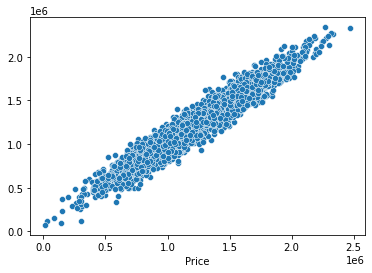

In [42]:
sns.scatterplot(y_test, predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

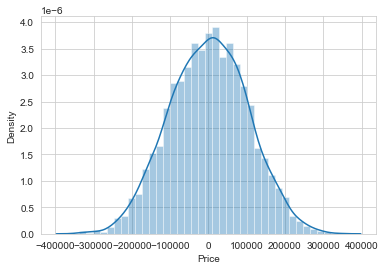

In [51]:
sns.set_style('whitegrid')
sns.distplot((y_test - predictions))

In [58]:
print('MAE : ', mean_absolute_error(y_test, predictions))
print('MSE : ', mean_squared_error(y_test, predictions))
print('RMSE : ', np.sqrt(mean_absolute_error(y_test, predictions)))

MAE :  82207.71967151482
MSE :  10359130030.72448
RMSE :  286.7188861437537
